In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

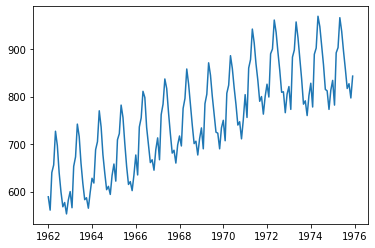

In [6]:
plt.plot(milk)
plt.show()

In [10]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk.values.reshape(-1))

(-1.3038115874221312,
 0.6274267086030308,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [17]:
milk['milk'] = milk['milk'] / milk.index.days_in_month 

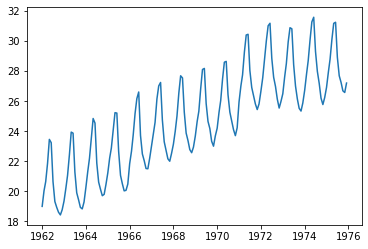

In [18]:
plt.plot(milk)
plt.show()

In [19]:
milk.sum()

milk    4166.326662
dtype: float64